           State/UTs                                        Crime Heads  \
0     ANDHRA PRADESH  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   
1  ARUNACHAL PRADESH  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   
2              ASSAM  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   
3              BIHAR  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   
4       CHHATTISGARH  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   

   Below 18 Years  Between 18-30 Years  Between 30-45 Years  \
0               0                    4                    3   
1               0                    0                    0   
2               0                    0                    0   
3               0                    0                    0   
4               0                    0                    0   

   Between 45-60 Years  Above 60 Years  Total  
0                    1               0      8  
1                    0               0      0  
2                    0    

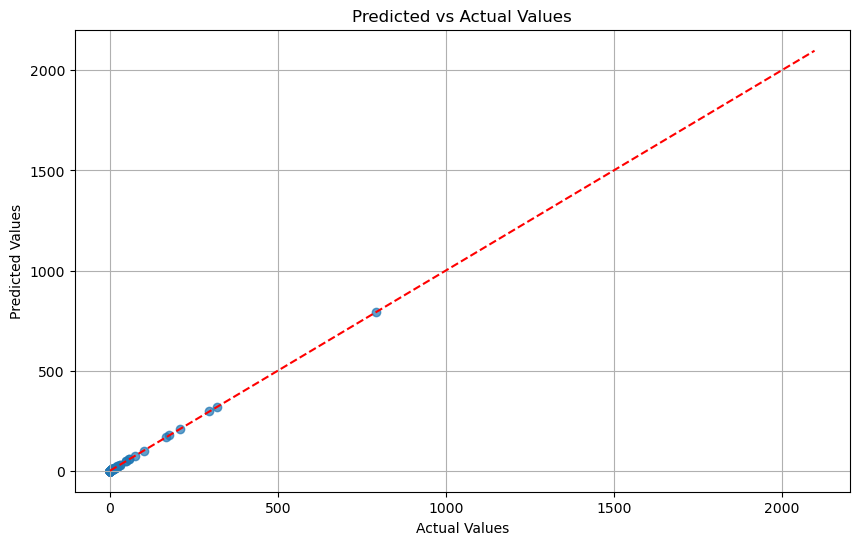

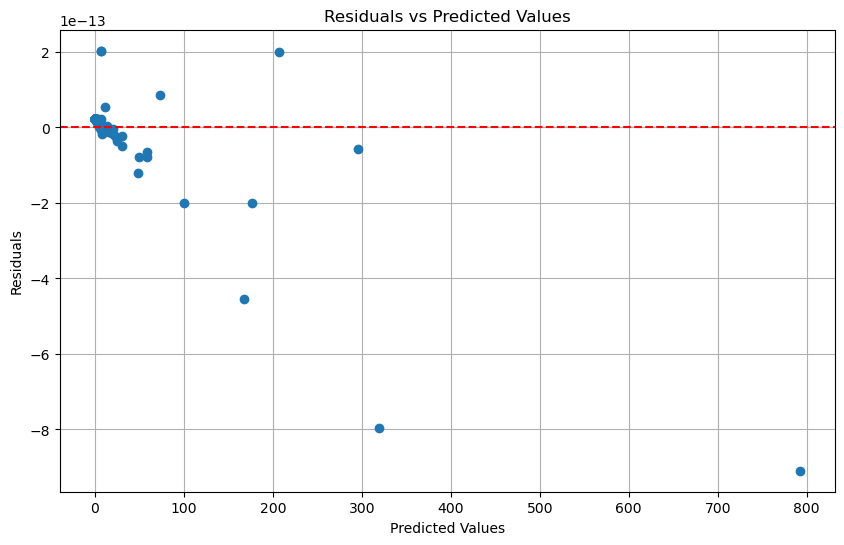

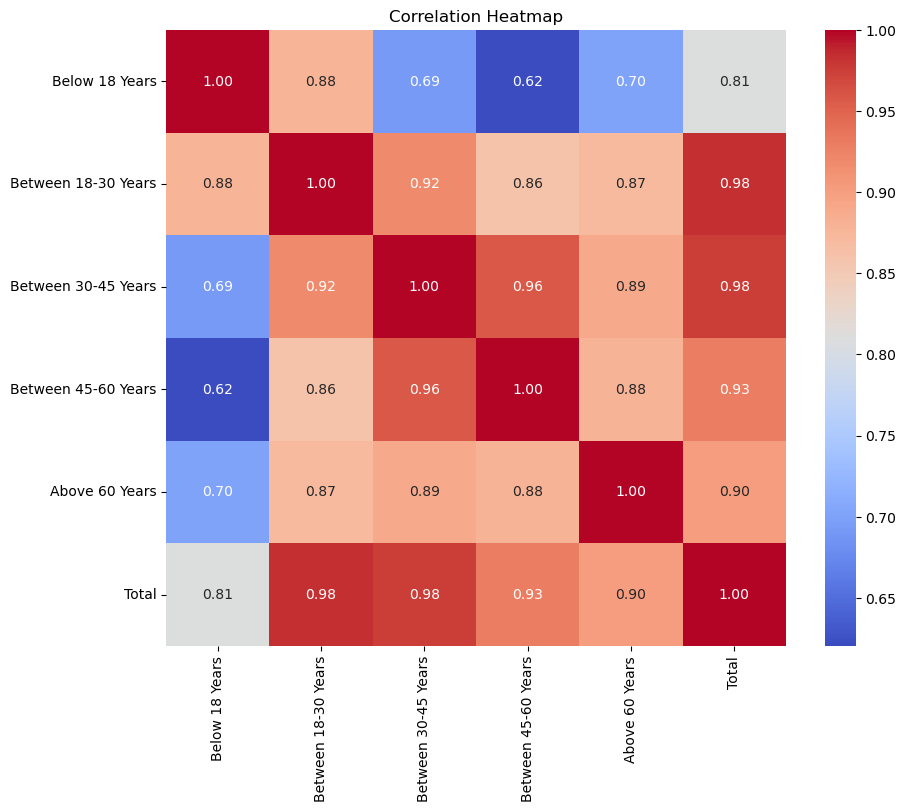

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
file_path = "C:\\Users\\brian\\Downloads\\digitalforensicsevidence.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Preprocess the data
# Ensure numerical columns are of type float
data[['Below 18 Years', 'Between 18-30 Years', 'Between 30-45 Years', 'Between 45-60 Years', 'Above 60 Years', 'Total']] = data[['Below 18 Years', 'Between 18-30 Years', 'Between 30-45 Years', 'Between 45-60 Years', 'Above 60 Years', 'Total']].apply(pd.to_numeric, errors='coerce')

# Prepare data for linear regression
X = data[['Below 18 Years', 'Between 18-30 Years', 'Between 30-45 Years', 'Between 45-60 Years', 'Above 60 Years']]
y = data['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
intercept = model.intercept_
coefficients = model.coef_

# Output the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r_squared}')
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

# Visualizations
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

# Line plot of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.plot(y_pred, residuals, 'o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


           State/UTs                                        Crime Heads  \
0     ANDHRA PRADESH  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   
1  ARUNACHAL PRADESH  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   
2              ASSAM  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   
3              BIHAR  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   
4       CHHATTISGARH  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   

   Below 18 Years  Between 18-30 Years  Between 30-45 Years  \
0               0                    4                    3   
1               0                    0                    0   
2               0                    0                    0   
3               0                    0                    0   
4               0                    0                    0   

   Between 45-60 Years  Above 60 Years  Total  
0                    1               0      8  
1                    0               0      0  
2                    0    

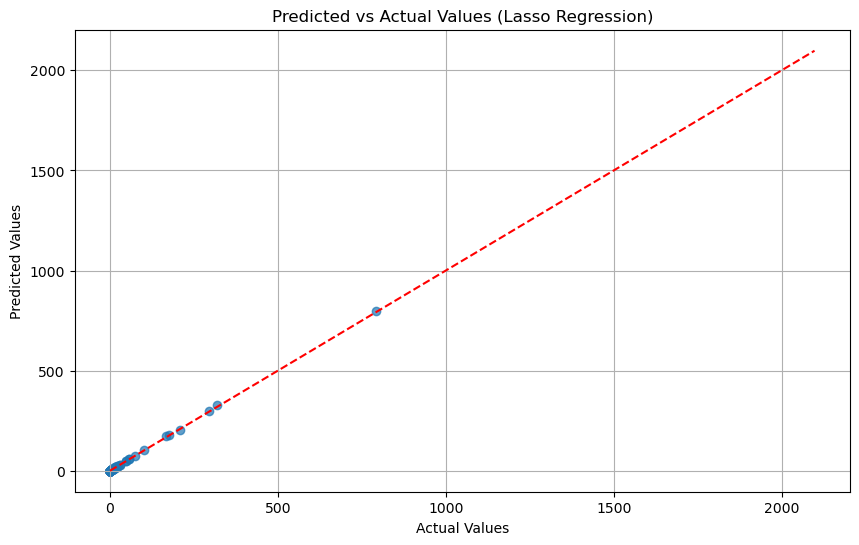

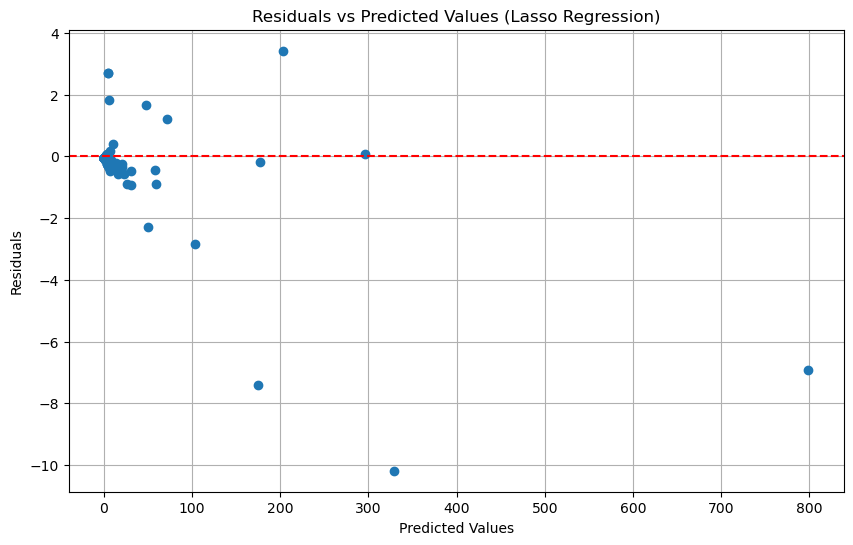

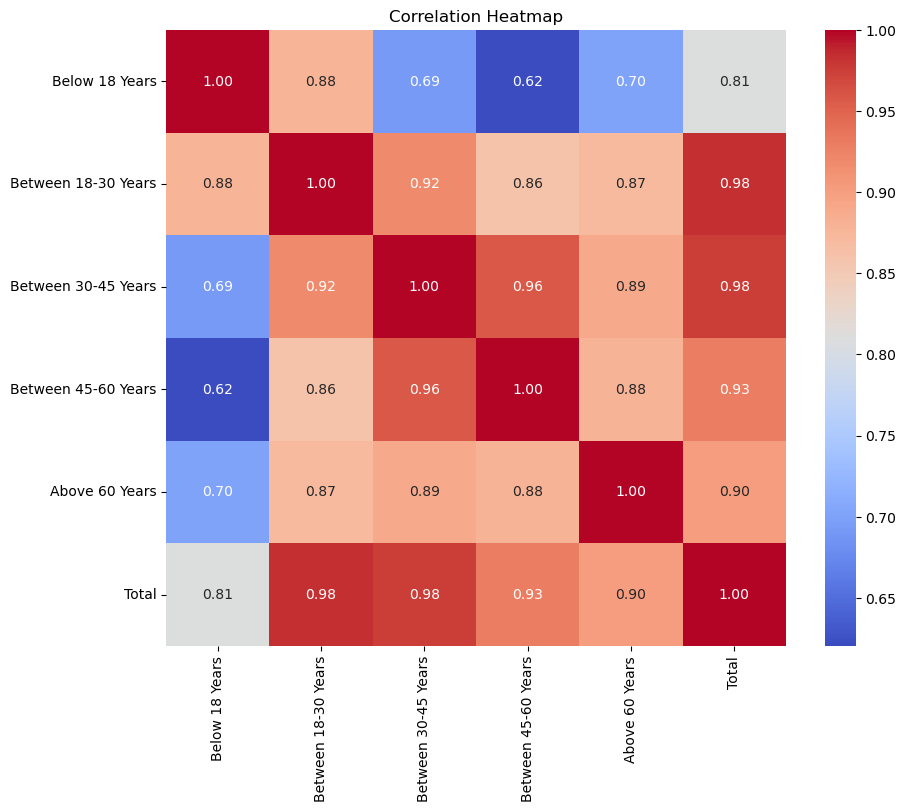

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
file_path = "C:\\Users\\brian\\Downloads\\digitalforensicsevidence.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Preprocess the data
# Ensure numerical columns are of type float
data[['Below 18 Years', 'Between 18-30 Years', 'Between 30-45 Years', 'Between 45-60 Years', 'Above 60 Years', 'Total']] = data[['Below 18 Years', 'Between 18-30 Years', 'Between 30-45 Years', 'Between 45-60 Years', 'Above 60 Years', 'Total']].apply(pd.to_numeric, errors='coerce')

# Prepare data for Lasso regression
X = data[['Below 18 Years', 'Between 18-30 Years', 'Between 30-45 Years', 'Between 45-60 Years', 'Above 60 Years']]
y = data['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
intercept = lasso_model.intercept_
coefficients = lasso_model.coef_

# Output the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r_squared}')
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

# Visualizations
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.title('Predicted vs Actual Values (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

# Line plot of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.plot(y_pred, residuals, 'o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Lasso Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Initial Data:
           State/UTs                                        Crime Heads  \
0     ANDHRA PRADESH  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   
1  ARUNACHAL PRADESH  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   
2              ASSAM  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   
3              BIHAR  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   
4       CHHATTISGARH  TAMPERING COMPUTER SOURCE DOCUMENTS (SECTION 6...   

   Below 18 Years  Between 18-30 Years  Between 30-45 Years  \
0               0                    4                    3   
1               0                    0                    0   
2               0                    0                    0   
3               0                    0                    0   
4               0                    0                    0   

   Between 45-60 Years  Above 60 Years  Total  
0                    1               0      8  
1                    0               0      0  
2           

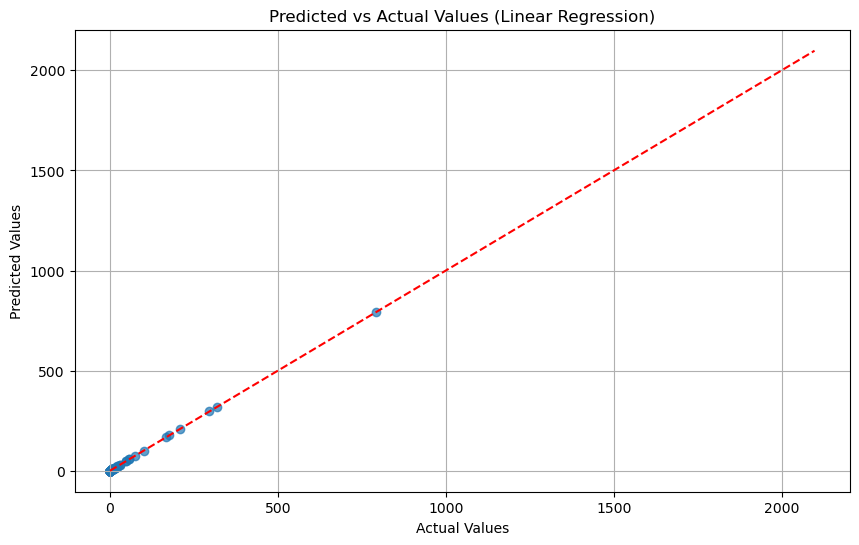

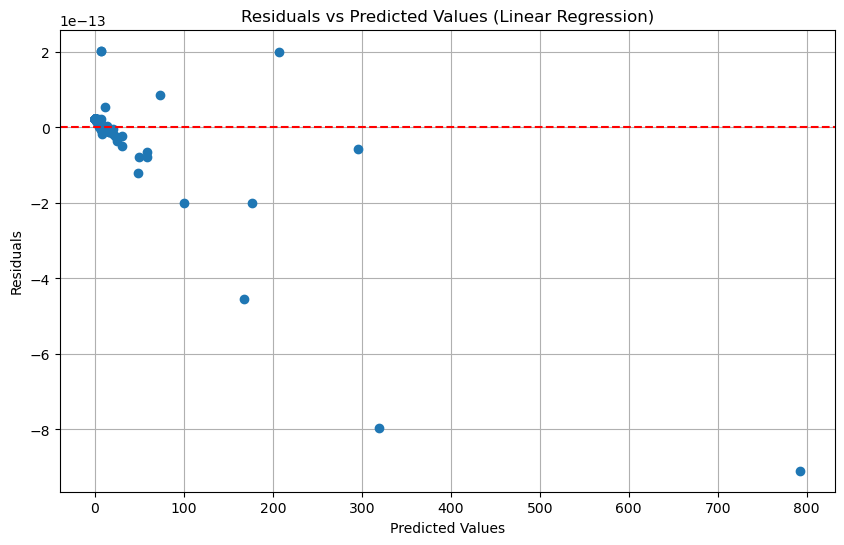

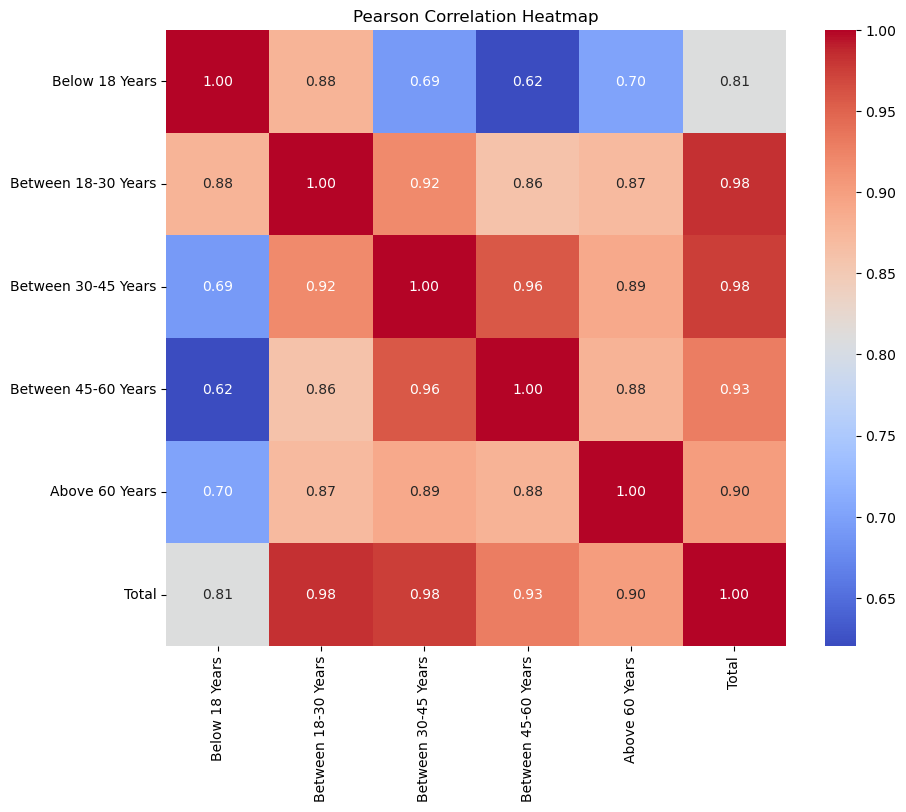

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
file_path = "C:\\Users\\brian\\Downloads\\digitalforensicsevidence.csv"
data = pd.read_csv(file_path)

# Display the first few rows and data types of the dataset
print("Initial Data:")
print(data.head())
print("\nData Types:")
print(data.dtypes)

# Select relevant columns and convert them to numeric
numeric_columns = ['Below 18 Years', 'Between 18-30 Years', 'Between 30-45 Years', 'Between 45-60 Years', 'Above 60 Years', 'Total']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for any non-numeric values that were coerced to NaN
nan_rows = data[data[numeric_columns].isna().any(axis=1)]
if not nan_rows.empty:
    print("\nRows with non-numeric values (now NaN):")
    print(nan_rows)

# Drop rows with NaN values in numeric columns
data.dropna(subset=numeric_columns, inplace=True)

# Confirm the remaining data
print("\nData after dropping NaNs:")
print(data.head())

# Calculate Pearson correlation matrix
correlation_matrix = data[numeric_columns].corr(method='pearson')
print("\nPearson Correlation Matrix:\n", correlation_matrix)

# Prepare data for linear regression
X = data[['Below 18 Years', 'Between 18-30 Years', 'Between 30-45 Years', 'Between 45-60 Years', 'Above 60 Years']]
y = data['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
intercept = linear_model.intercept_
coefficients = linear_model.coef_

# Output the results
print(f'\nMean Squared Error (MSE): {mse}')
print(f'R-squared: {r_squared}')
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

# Visualizations
# 1. Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.title('Predicted vs Actual Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

# 2. Line plot of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.plot(y_pred, residuals, 'o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Linear Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# 3. Heatmap of the Pearson correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

